## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum10.txt"

@author: johnson
"""
# When numpy version = 1.19.2 => gensim version should downgrade to 3.8.3
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("KCC Data/CkipNewsCisTest-KccDict2020.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['馬英九', '昨天', '上午', '視察', '衛武營藝術文化中心', '文化部', '洪孟啟', '工程', '副主委', '顏久榮', '高雄市', '副市長', '吳宏謀', '一同', '到場', '聽取', '衛武營', '興建', '工程', '簡報', '瞭解', '工程進度', '執行', '情形', '完成', '百分之九十五', '工程進度', '共計', '投入', '新臺幣', '一百零五億八千萬', '經費', '預計', '六月', '竣工', '明年', '開館', '營運', '目標', '馬英九', '指出', '衛武營', '案子', '九十四年', '編列', '預算', '核定', '施工', '正式', '完工', '時間', '長達', '十三', '原先', '預計', '故宮', '南院', '工程', '單位', '部門', '克服', '困難', '值得', '檢討', '總統', '致詞', '民國', '九十九年', '主持', '動土', '典禮', '原從', '黃土', '生長出', '有如', '魟魚', '悠遊', '海浪', '建築', '實在', '驚豔', '過程', '包含', '團隊', '付出', '努力', '籌建', '過程', '艱辛', '各界', '關注', '投入', '新建', '工程', '幾近', '完工', '特別', '肯定', '文化部', '籌建', '過程', '付出', '辛勞', '高雄市政府', '各界', '支持', '配合', '總統', '文化', '城市', '期許', '衛武營藝術文化中心', '臺灣', '藝術', '力量', '南方', '集結地', '臺北', '國家兩廳院', '臺中', '國家歌劇院', '攜手', '並進', '打造', '台灣', '國際', '藝文', '版圖', '地標', '文化部', '洪孟啟', '衛武營', '考驗', '面臨', '營運', '壓力', '文化部', '衛武營', '南部', '高雄市文化中心', '嘉義', '文化', '園區', '故宮', '南院', '台南', '地方', '藝文', '團體', '高雄大東文化藝術中心', '屏東', '演藝廳'

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(8996 unique tokens: ['一同', '一百零五億八千萬', '上午', '並進', '主持']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 5), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "C://mallet/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=10)
output = open("KCC Data/NewsCisTest-KccDict2020-MalletNum10.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=10, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('高雄市', 0.03470857891290111), ('台灣', 0.023248199083169614), ('陳菊', 0.022920759659463), ('市長', 0.014079895219384414), ('吳宏謀', 0.010478061558611657), ('熊本', 0.010478061558611657), ('市府', 0.008840864440078585), ('透過', 0.008840864440078585), ('擔任', 0.008840864440078585), ('日本', 0.008840864440078585), ('副市長', 0.008185985592665358), ('支持', 0.008185985592665358), ('主委', 0.007531106745252128), ('出席', 0.007203667321545514), ('特別', 0.007203667321545514), ('昨天', 0.0068762278978389), ('持續', 0.0068762278978389), ('發展', 0.0068762278978389), ('代表', 0.006548788474132285), ('林全', 0.006221349050425672)]

strTM =  1[('總統', 0.03709476309226933), ('特赦', 0.033042394014962596), ('陳水扁', 0.031795511221945134), ('民主進步黨', 0.024002493765586035), ('陳菊', 0.01963840399002494), ('立委', 0.016521197007481298), ('昨天', 0.014027431421446385), ('馬英九', 0.01371571072319202), ('前總統', 0.012780548628428928), ('政府', 0.012468827930174564), ('提案', 0.010910224438902744), ('柯文哲', 0.010910224438902744), ('政治', 0.01028678304

### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=50, start=5, step=5)

Num_topics:  5  Coherence Score=  0.46110897209775725
Num_topics:  10  Coherence Score=  0.4445335230837128
Num_topics:  15  Coherence Score=  0.43717124931898815
Num_topics:  20  Coherence Score=  0.4325257979547145
Num_topics:  25  Coherence Score=  0.4305361339319545
Num_topics:  30  Coherence Score=  0.4414587399337322
Num_topics:  35  Coherence Score=  0.45434665953989345
Num_topics:  40  Coherence Score=  0.46186419824575287
Num_topics:  45  Coherence Score=  0.4679034593567891


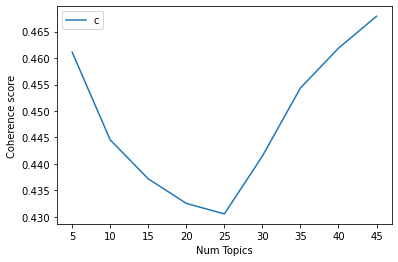

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=50; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 5  has Coherence Value of 0.4611
Num Topics = 10  has Coherence Value of 0.4445
Num Topics = 15  has Coherence Value of 0.4372
Num Topics = 20  has Coherence Value of 0.4325
Num Topics = 25  has Coherence Value of 0.4305
Num Topics = 30  has Coherence Value of 0.4415
Num Topics = 35  has Coherence Value of 0.4543
Num Topics = 40  has Coherence Value of 0.4619
Num Topics = 45  has Coherence Value of 0.4679
Optimal Topic Num = 45  Highest Value = 0.4679034593567891


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(11,
  '0.034*"體驗" + 0.033*"教育" + 0.023*"學校" + 0.018*"單位" + 0.016*"展示" + 0.016*"參與" '
  '+ 0.015*"安排" + 0.014*"特色" + 0.013*"技職" + 0.012*"項目" + 0.012*"運動" + '
  '0.012*"選手" + 0.012*"大學" + 0.011*"活動" + 0.011*"展現" + 0.010*"成果" + '
  '0.010*"高市府" + 0.009*"校長" + 0.009*"老師" + 0.008*"主辦"'),
 (28,
  '0.063*"市府" + 0.037*"指出" + 0.025*"提出" + 0.022*"水利局" + 0.017*"資料" + '
  '0.016*"污水" + 0.016*"方式" + 0.016*"使用費" + 0.015*"影響" + 0.015*"情形" + '
  '0.014*"基金" + 0.014*"辦法" + 0.013*"去年" + 0.013*"退費" + 0.013*"軌道" + 0.013*"徵收" '
  '+ 0.012*"自治條例" + 0.012*"目前" + 0.012*"訂定" + 0.012*"誤收"'),
 (18,
  '0.050*"高雄市" + 0.041*"高雄" + 0.034*"城市" + 0.033*"陳菊" + 0.032*"文化" + '
  '0.031*"交流" + 0.027*"日本" + 0.023*"市長" + 0.019*"長野縣" + 0.018*"昨天" + '
  '0.017*"團隊" + 0.015*"邀請" + 0.013*"歷史" + 0.013*"教育" + 0.012*"特別" + 0.012*"觀光" '
  '+ 0.012*"拜會" + 0.011*"值得" + 0.010*"互動" + 0.010*"建築"'),
 (17,
  '0.030*"吳宏謀" + 0.026*"主委" + 0.020*"能力" + 0.017*"行政院" + 0.016*"高雄市政府環境保護局" + '
  '0.016*"出任" + 0.015*"高雄市政府" + 0.014*"動物" + 0.013*"